* 머신러닝 모델은 여러 가지 방법으로 예측 성능을 평가할 수 있다.
- 성능 평가 지표는 일반적으로 모델이 분류냐 회귀냐에 따라 여러 종류로 나뉜다.
- 회귀의 경우 대부분 실제값과 예측값의 오차 평균값에 기반한다. 분류의 경우 일반적으로는 실제 결과 데이터와 예측 결과 데이터가 얼마나 정확하고 오류가 적게 발생하는가에 기반하지만, 이진 분류에서는 정확도보다는 다른 성능 평가 지표가 더 중요시되는 경우가 많다.

- 분류의 성능 평가 지표 \
-- 정확도(Accuracy) \
-- 오차행렬(Confusion Matrix) \
-- 정밀도(Precision) \
-- 재현율(Recall) \
-- F1 스코어 \
-- ROC AUC 

In [2]:
# 1. 정확도 (Accuracy) = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

from sklearn.base import BaseEstimator
import numpy as np

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, X, y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0, 그렇지 않으면 1로 예측함.
    def predict(self, X):
        pred = np.zeros((X.shape[0], 1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else:
                pred[i] = 1

        return pred
    
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le =le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 원본 데이터를 재로팅, 데이터 가공, 학습 데이터/테스트 데이터 분할
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.2, random_state=0)

# 위에서 생성한 Dummy classifier를 이용해 학습/예측/평가 수행
myclf = MyDummyClassifier()
myclf.fit(X_train, y_train)

mypredictions = myclf.predict(X_test)
print('Dummy Classifier 의 정확도는 {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier 의 정확도는 0.7877


In [3]:
# 위처럼 단순한 알고리즘으로 예측을 하더라도 데이터의 구성에 따라 정확도 결과는 약 78.77%로 꽤 높은 수치가 나올 수 있기에 정확도를 평가 지표로 사용할 때는 매우 신중해야 한다.
# 특히 정확도는 불균형한 레이블 값 분포에서 ML 모델의 성능을 판단할 경우, 적합한 평가 지표가 아니다.

In [5]:
# 불균형한 데이터 세트와 Dummy Classifier 생성 한 예제 코드

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class myFakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass

    # 입력값으로 들어오는 X 데이터 세트의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self, X):
        return np.zeros( (len(X), 1), dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits()을 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7이면 True이고, astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = myFakeClassifier()
fakeclf.fit(X_train, y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는 : {:.3f}'.format(accuracy_score(y_test, fakepred)))

# 이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용돼서는 안된다.
# 이러한 한계점 극복을 위해 여러 가지 분류 지표와 함께 적용하여 ML 모델 성능 평가 해야한다.

레이블 테스트 세트 크기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
Name: count, dtype: int64
모든 예측을 0으로 하여도 정확도는 : 0.900


---

In [6]:
# 2. 오차행렬

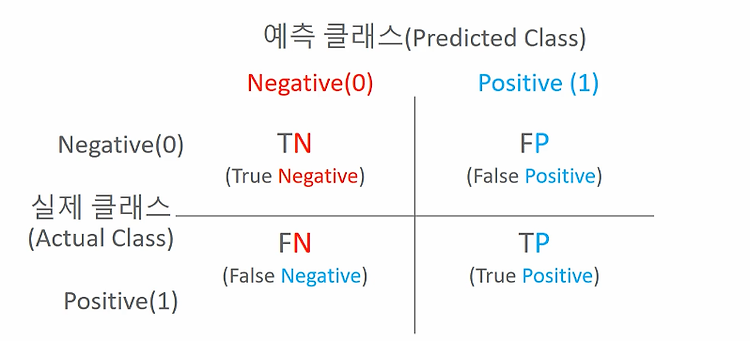

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

# 출력된 오차 행렬은 ndarray 형태로 이진 분류의 TN, FP, FN, FP는 상단 도표와 동일한 위치를 가지고 array에서 가져올 수 있다.
# 따라서 TN은 전체 450건 중 무조건 Negative 0으로 예측해서 True가 된 결과 405건, FP는 Positive 1로 예측한 건수가 없으므로 0건,
# FN은 Positive 1인 건수 45건을 Negative로 예측해서 False가 된 결과 45건, TP는 Positive 1로 예측한 건수가 없으므로 0건

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [9]:
# 위 값을 조합해 정확도, 정밀도, 재현율 값을 알 수 있다.
# 정확도 = (TN + TP) / (TN + FP + FN + TP)

---

In [10]:
# 3. 정밀도와 재현율

# 정밀도 = TP / (FP + TP)  # 예측을 Positive로 한 대상 중에 실제값이 Positive인 데이터의 비율
# 재현율(민감도, TPR) = TP / (FN + TP)  # 실제값이 Positive한 대상 중에 예측이 Positive인 데이터 비율

# 재현율이 상대적으로 더 중요한 지표인 경우는 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무 상 큰 영향이 발생하는 경우 (암판단 모델)
# 정밀도가 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우 (스팸메일 여부)

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#재로딩
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df,
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705


In [13]:
# 정밀도/재현율 트레이드 오프

# 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)를 조정해 정밀도 또는 재현율의 수치를 높일 수 있다.
# 하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한 쪽은 강제로 높이면 다른 하나의 수치는 떨어지기 쉽다. 이를 트레이드오프라고 부른다.

# 사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공한다.
# predict_proba() 메서드는 학습이 완료된 사이킷런 Classifier 객체에서 호출이 가능하며 테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다.
# predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스 값이 아닌 예측 확률 결과이다.

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print(f"pred_proba()결과 shape: {pred_proba.shape}")
print(f"pred_proba array에서 앞 3개만 샘플로 추출 : {pred_proba[:3]}")

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결괏값을 한눈에 확인
pred_proba_result= np.concatenate([pred_proba, pred.reshape(-1, 1)], axis=1)
print(f"두 개의 class 중에서 더 큰 확률을 클래스 값으로 에측 : {pred_proba_result[:3]}")

pred_proba()결과 shape: (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 : [[0.44935228 0.55064772]
 [0.86335513 0.13664487]
 [0.86429646 0.13570354]]
두 개의 class 중에서 더 큰 확률을 클래스 값으로 에측 : [[0.44935228 0.55064772 1.        ]
 [0.86335513 0.13664487 0.        ]
 [0.86429646 0.13570354 0.        ]]


In [18]:
# threshold 변수를 특정 값으로 설정하고 Binarizer 클래스를 객체로 생성하여 fit_transform()을 이용해 같거나 작으면 0, 크면 1로 반환 예제

# Binarizer 활용

from sklearn.preprocessing import Binarizer

X = [[1, -1, 2], 
     [2, 0, 0],
     [0, 1.1, 1.2]]

binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

print('-'*50)
# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_proba() 반환값이 두 번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출해 Binarizer 를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

print('-'*50)
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4

# predict_proba() 반환값이 두 번째 컬럼, 즉 Positive 클래스 컬럼 하나만 추출해 Binarizer 를 적용
pred_proba_1 = pred_proba[:, 1].reshape(-1, 1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)


### 임곗값을 낮추니 재현율은 올라가고 정밀도가 떨어졌다.
### 분류 결정 임곗값은 Positive 예측값을 결정하는 확률의 기준이 된다. 
### 확률이 0.5가 아닌 0.4부터 Postivie로 예측을 더 너그럽게 하기 때문에 임계값을 낮출수록 True값이 많아지게 된다.


print('-'*50)

# 이번에는 임곗값을 0.4에서부터 0.6까지 0.05씩 증가시키며 평가 지표를 조사해보기

thresholds = [0.4, 0.45, 0.5, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds llist 객체 내의 값을 차례로 iteration 하면서 Evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print(f"임곗값 : {custom_threshold}")
        get_clf_eval(y_test, custom_predict)

get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1, 1), thresholds)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]
--------------------------------------------------
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
--------------------------------------------------
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
--------------------------------------------------
임곗값 : 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197
임곗값 : 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869
임곗값 : 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705
임곗값 : 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377
임곗값 : 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213


In [30]:
# 이와 유사한 precision_recall_curve() API
# precision_recall_curve( ) 를 이용하여 임곗값에 따른 정밀도-재현율 값 추출 

from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1]

# 실제값 데이터 세트와 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print(f"반환된 분류 결정 임곗값 배열의 Shape : {thresholds.shape}")

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출
thr_index = np.arange(0, thresholds.shape[0], 15)
print(f"샘플 추출을 위한 임곗값 배열의 index 10개 : {thr_index}")
print(f"샘플용 10개의 임곗값 : {np.round(thresholds[thr_index], 2)}")

# 15 step 단위로 추출된 임곗값에 따른 정밀도와 재현율 값
print(f"샘플 임계값 별 정밀도 : {np.round(precisions[thr_index], 3)}")
print(f"샘플 임계값 별 재현율 : {np.round(recalls[thr_index], 3)}")

반환된 분류 결정 임곗값 배열의 Shape : (165,)
샘플 추출을 위한 임곗값 배열의 index 10개 : [  0  15  30  45  60  75  90 105 120 135 150]
샘플용 10개의 임곗값 : [0.02 0.11 0.13 0.14 0.16 0.24 0.32 0.45 0.62 0.73 0.87]
샘플 임계값 별 정밀도 : [0.341 0.372 0.401 0.44  0.505 0.598 0.688 0.774 0.915 0.968 0.938]
샘플 임계값 별 재현율 : [1.    1.    0.967 0.902 0.902 0.902 0.869 0.787 0.705 0.492 0.246]


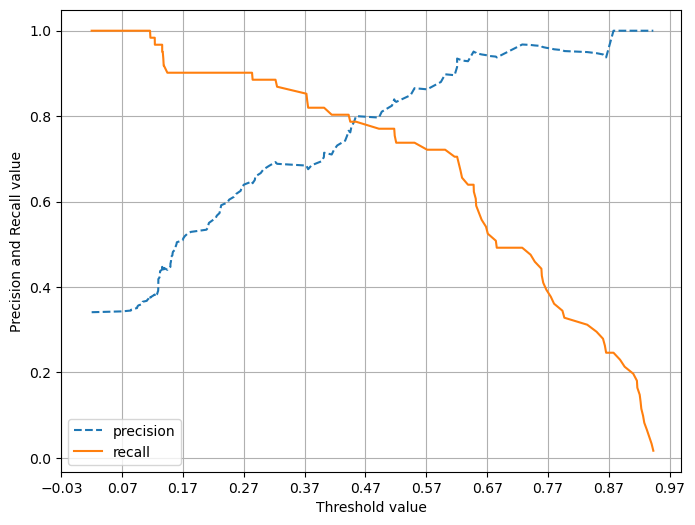

In [31]:
# 시각화

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [32]:
# F1 스코어 = 2*(precision * recall) / (precision + recall)

from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7966


In [33]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값 : 0.4
오차 행렬
[[97 21]
 [11 50]]
정확도: 0.8212, 정밀도: 0.7042, 재현율: 0.8197, F1:0.7576
임곗값 : 0.45
오차 행렬
[[105  13]
 [ 13  48]]
정확도: 0.8547, 정밀도: 0.7869, 재현율: 0.7869, F1:0.7869
임곗값 : 0.5
오차 행렬
[[108  10]
 [ 14  47]]
정확도: 0.8659, 정밀도: 0.8246, 재현율: 0.7705, F1:0.7966
임곗값 : 0.55
오차 행렬
[[111   7]
 [ 16  45]]
정확도: 0.8715, 정밀도: 0.8654, 재현율: 0.7377, F1:0.7965
임곗값 : 0.6
오차 행렬
[[113   5]
 [ 17  44]]
정확도: 0.8771, 정밀도: 0.8980, 재현율: 0.7213, F1:0.8000


In [34]:
# ROC 곡선과 AUC
# ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용되는 ㅈ ㅣ표이다.
# ROC 곡선은 (FPR(False Positive Rate)이 변할 때 TPR(재현율, True Positive Rate)이 어떻게 변화하는지 나타내는 곡선이다.)
# FPR을 X축, TPR을 Y축

# 특이성(Specificity, TNR)은 실제값 Negative(음성)이 정확히 예측돼야 하는 수준을 나타낸다. (질병이 없는 건강한 사람은 질병이 없는 것으로 음성 판정)
# TNR인 특이성은 TN / (FP + TN) 이고 ROC곡선의 X축인 FPR은 FP / (FP + TN) 이므로 1-TNR (1-특이성)으로 표현된다.

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


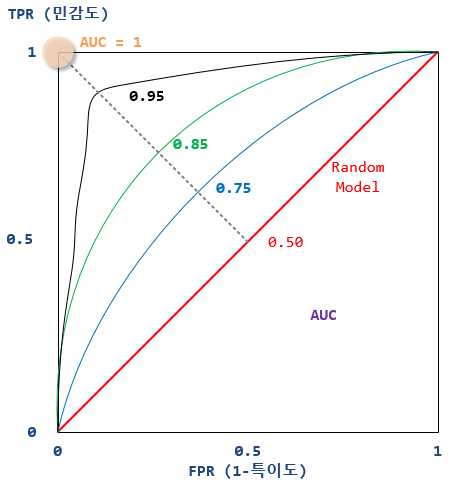

In [38]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열에서 샘플로 데이터를 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index:', thr_index)
print('샘플 index로 추출한 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index: [ 1  6 11 16 21 26 31 36 41 46]
샘플 index로 추출한 임곗값:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
샘플 임곗값별 FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
샘플 임곗값별 TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


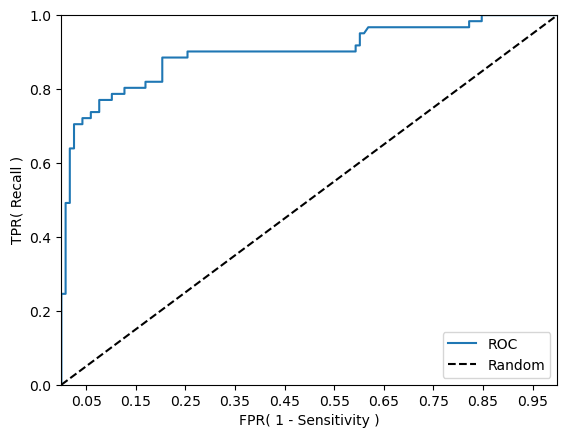

In [35]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [36]:
from sklearn.metrics import roc_auc_score
pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.8987


In [37]:

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))